# Visualize Distribution of Views for STL10 dataset

For a self-supervised learning system, it's augmentation / data generation pipeline is crucial.


In [2]:
%load_ext autoreload 
%autoreload 2
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from PIL import Image

## Prepare STL10 Dataset and Pre-computed Saliency Maps

In [3]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from os.path import join
import matplotlib.pylab as plt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, utils

In [5]:
# it took 2-5 mins to download the STL10 dataset
dataset_dir = "/content/Dataset"
dataset = datasets.STL10("Dataset", split="unlabeled", download=True, transform=transforms.ToTensor(),)

  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting Dataset/stl10_binary.tar.gz to Dataset


In [6]:
# download the saliency data hosted at my Google Drive.
%cd Dataset
!gdown https://drive.google.com/uc?id=1tpBwMG1FsmSloqPDSQ6tfRVTeZ3RR89n # confirmed: this is stl10_unlabeled_salmaps_salicon.npy

/content/Dataset
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1tpBwMG1FsmSloqPDSQ6tfRVTeZ3RR89n 



In [7]:
# run generate_salmaps_dataset.py to get stl10_unlabeled_salmaps_salicon.npy to folder /content/Dataset
%cd /content/
!git clone https://github.com/Animadversio/FastSal

/content
Cloning into 'FastSal'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 154 (delta 49), reused 149 (delta 45), pack-reused 0
Receiving objects: 100% (154/154), 152.05 MiB | 14.37 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [8]:
!pip install kornia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 517 kB 4.2 MB/s 


In [9]:
%cd /content/
!git clone https://github.com/Animadversio/Foveated_Saccade_SimCLR.git
%cd Foveated_Saccade_SimCLR/
!git checkout dev
!git pull

/content
Cloning into 'Foveated_Saccade_SimCLR'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 152 (delta 0), reused 2 (delta 0), pack-reused 147
Receiving objects: 100% (152/152), 1.55 MiB | 5.64 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/Foveated_Saccade_SimCLR
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
Already up to date.


## Visualize augmented dataset

In [10]:
%cd /content/Foveated_Saccade_SimCLR

/content/Foveated_Saccade_SimCLR


In [11]:
dataset_dir = "/content/Dataset"

In [12]:
from data_aug.dataset_w_salmap import Contrastive_STL10_w_salmap
from torchvision.transforms import RandomResizedCrop
from data_aug.saliency_random_cropper import RandomResizedCrop_with_Density, RandomCrop_with_Density
from data_aug.visualize_aug_dataset import visualize_samples, visualize_augmented_dataset, visualize_saliency_maps_w_imgs
from data_aug.dataset_w_salmap import Contrastive_STL10_w_CortMagnif, get_RandomMagnifTfm

In [13]:
idxs = [96659, 54019, 88327, 81148, 98469, 77493, 131, 58202, 66666, 65017]

### Control

In [14]:
# run generate_salmaps_dataset.py to generate /content/Dataset/stl10_unlabeled_salmaps_salicon.npy

%cd /content/Foveated_Saccade_SimCLR/
from data_aug.calc_saliency import process_stl10_fastsal
import sys
fastsal_dir = "/content/FastSal"
sys.path.append(fastsal_dir)

%mv /content/FastSal/utils.py /content/FastSal/utils_fastsal.py 
# rename utils.py in fastsal to avoid calling utils.py in Foveated_Saccade_SimCLR

# /content/Foveated_Saccade_SimCLR/data_aug/calc_saliency.py
# Line 198   from utils_fastsal import load_weight

# /content/FastSal/models/adaptation_layer.py upload my version (see code changes in Demo 1)
process_stl10_fastsal(fastsal_dir + "/weights/salicon_A.pth")

/content/Foveated_Saccade_SimCLR


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting /scratch1/fs1/crponce/Datasets/stl10_binary.tar.gz to /scratch1/fs1/crponce/Datasets


100%|██████████| 1334/1334 [07:26<00:00,  2.99it/s]


In [19]:
# process_stl10_fastsal saved to /scratch1/fs1/crponce/Datasets/stl10_unlabeled_salmaps_salicon.npy
%mv /scratch1/fs1/crponce/Datasets/stl10_unlabeled_salmaps_salicon.npy /content/Dataset/stl10_unlabeled_salmaps_salicon.npy

In [20]:
train_dataset = Contrastive_STL10_w_salmap(dataset_dir=dataset_dir, 
            disable_crop=False, density_cropper=None, split="unlabeled", 
            salmap_control=False, memmap=True)

Files already downloaded and verified


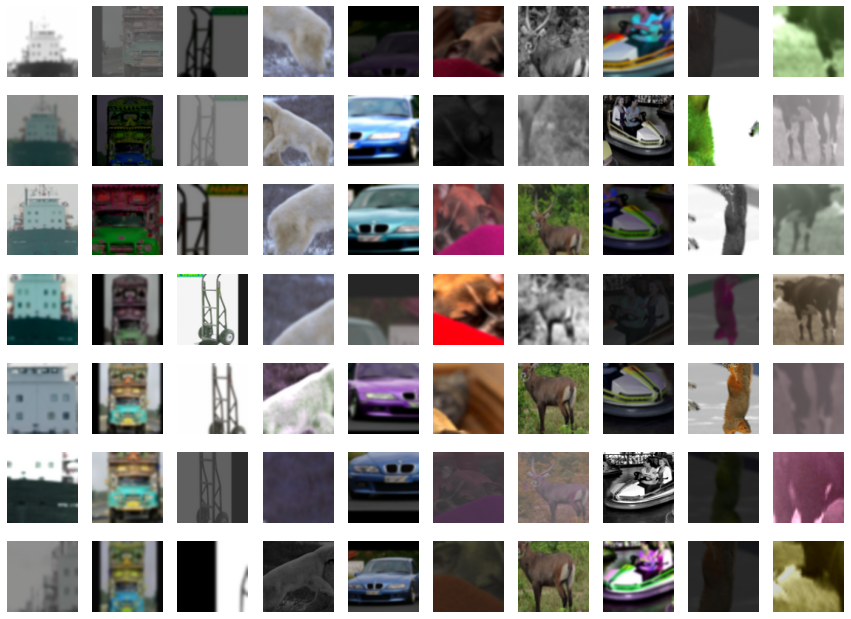

In [21]:
rndcropper = RandomResizedCrop(96, )
train_dataset.density_cropper = lambda img, salmap: rndcropper(img)
train_dataset.n_views = 7
_, idxs = visualize_samples(train_dataset, idxs)

### Experiment 1: Foveation as Blur (without crop)

In [22]:
train_dataset = Contrastive_STL10_w_salmap(dataset_dir=dataset_dir, 
            disable_crop=True, density_cropper=None, split="unlabeled", 
            salmap_control=False, memmap=True)

Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


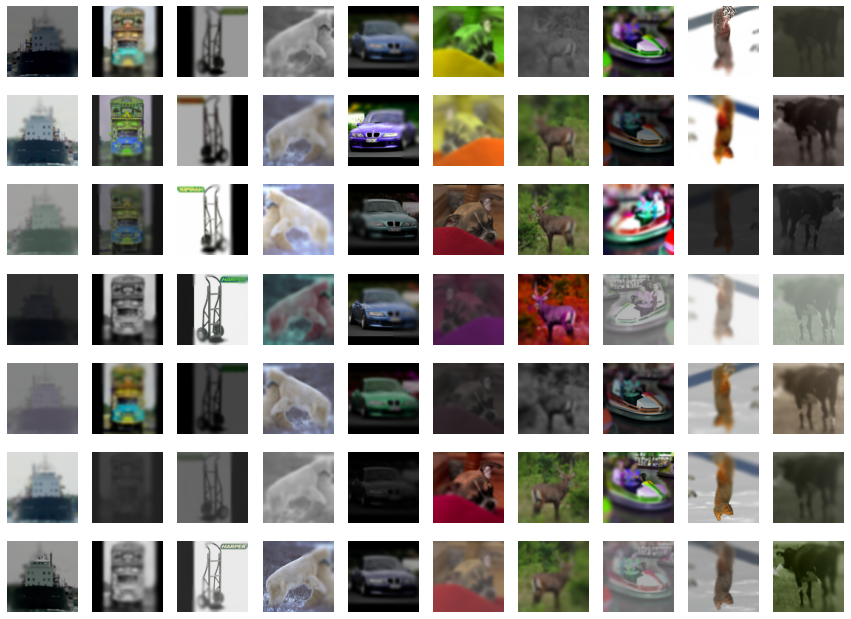

In [23]:
train_dataset.transform = train_dataset.get_simclr_post_crop_transform(96, blur=True, foveation=True,
                  kerW_coef=0.04, fov_area_rng=[0.05, 0.8], bdr=12)
train_dataset.n_views = 7
_, idxs = visualize_samples(train_dataset, idxs)

### Experiment 3: Crop + Saliency Based Saccade 

In [24]:
train_dataset = Contrastive_STL10_w_salmap(dataset_dir=dataset_dir,
            density_cropper=None, split="unlabeled", memmap=True) # use memory mapping to load saliency maps to save memory. 

Files already downloaded and verified


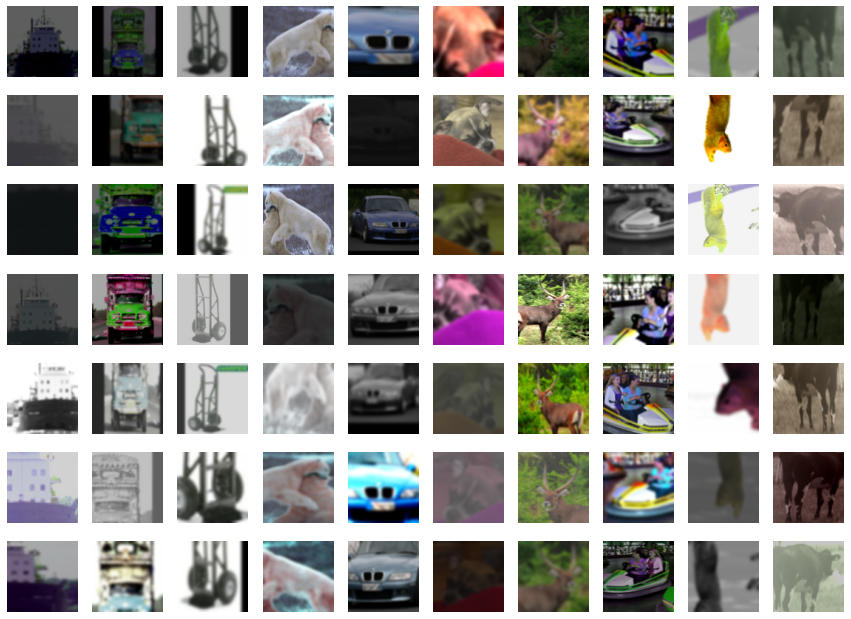

In [27]:
crop_temperature = 1 # 0.3-4.5
pad_img = False # see docs

cropper = RandomResizedCrop_with_Density(96, \
        temperature=crop_temperature, pad_if_needed=pad_img)
cropper.pad_if_needed = False
cropper.temperature = 0.5
train_dataset.n_views = 7
train_dataset.density_cropper = cropper
_, idxs = visualize_samples(train_dataset, idxs)
# _, idxs = visualize_samples(train_dataset, ) # randomly choosing images

### Experiment 2: Cortical Magnification

In [28]:
del train_dataset

In [29]:
train_dataset = Contrastive_STL10_w_CortMagnif(dataset_dir=dataset_dir,
    transform=None, split="unlabeled", n_views=2,
    crop=False, magnif=True, sal_sample=False, memmap=True)

Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4216: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


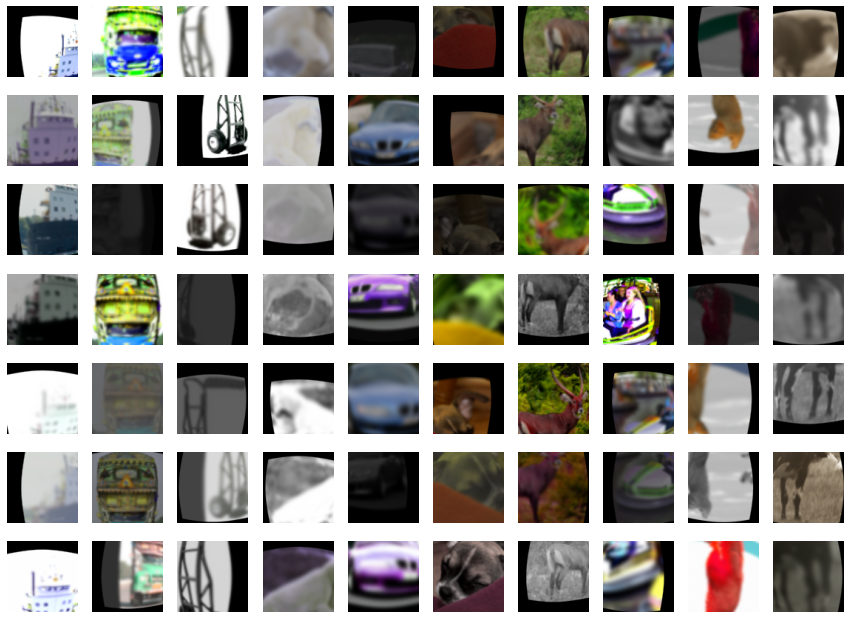

In [30]:
train_dataset.magnifier = get_RandomMagnifTfm(grid_generator="radial_quad_isotrop",
              bdr=16, fov=20, K=20, cover_ratio=0.3,
              sal_sample=False, )
train_dataset.n_views = 7
_, idxs = visualize_samples(train_dataset, idxs)

### Experiment 4: Cortical Magnification + Saliency Based Saccade

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4216: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


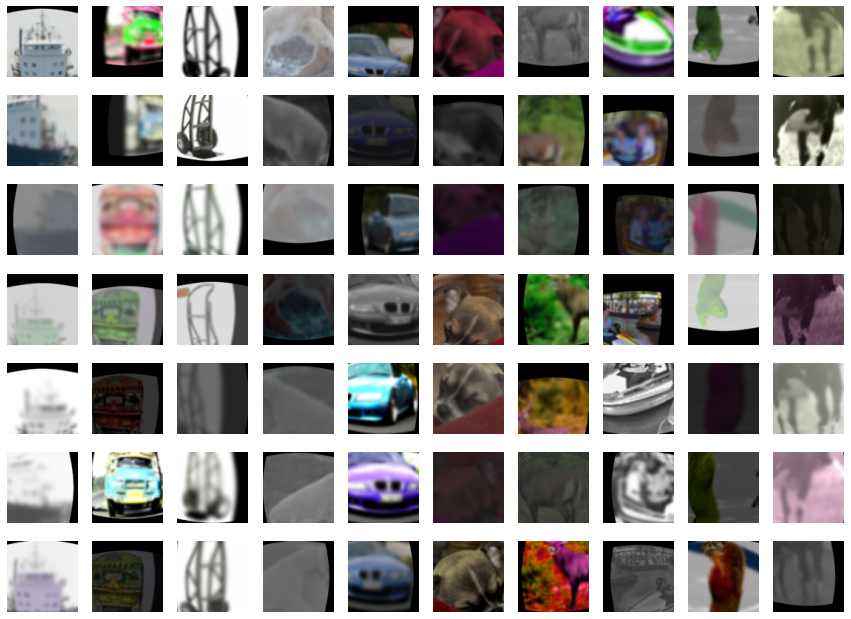

In [31]:
train_dataset.magnifier = get_RandomMagnifTfm(grid_generator="radial_quad_isotrop",
              bdr=16, fov=20, K=20, cover_ratio=0.3,
              sal_sample=True, sample_temperature=0.5,)
train_dataset.n_views = 7
_, idxs = visualize_samples(train_dataset, idxs)